### 1.Load the cortex dataset located in the archive of the last course

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Data_Cortex_Nuclear.csv')
data.head(20)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
5,309_6,0.447506,0.628176,0.367388,2.385939,4.807635,0.218578,0.176233,2.141282,0.195188,...,0.109446,0.439833,0.116657,0.140766,0.142180,1.816389,Control,Memantine,C/S,c-CS-m
6,309_7,0.428033,0.573696,0.342709,2.334224,4.473130,0.225173,0.184004,2.012414,0.195789,...,0.111483,0.406293,0.137229,0.156682,0.157499,1.528484,Control,Memantine,C/S,c-CS-m
7,309_8,0.416923,0.564036,0.327703,2.260135,4.268735,0.214834,0.179668,2.007985,0.189803,...,0.113080,0.382532,0.123376,0.155612,0.159409,1.652658,Control,Memantine,C/S,c-CS-m
8,309_9,0.386311,0.538428,0.317720,2.125725,4.063950,0.207222,0.167778,1.861514,0.180684,...,0.105490,0.435687,0.125173,0.152711,0.158235,1.834599,Control,Memantine,C/S,c-CS-m
9,309_10,0.380827,0.499294,0.362462,2.096266,3.598587,0.227649,0.188093,1.717861,0.188093,...,0.116906,0.414793,0.146133,0.188849,0.192334,1.516862,Control,Memantine,C/S,c-CS-m


In [5]:
data.columns

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

### 2.Fill missing entries (NaNs) in the numerical columns with 0

In [8]:
data = data.replace(np.nan, 0)

In [35]:
data.head(500)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,3488_1,0.317572,0.509816,0.331817,2.704573,4.196912,0.194039,0.162198,3.553028,0.258559,...,0.127143,0.424351,0.128896,0.171818,0.156299,0.967013,Control,Saline,S/C,c-SC-s
496,3488_2,0.312992,0.511085,0.321931,2.681883,4.196901,0.185340,0.158045,3.551490,0.271633,...,0.135270,0.430248,0.126547,0.171124,0.162401,0.924187,Control,Saline,S/C,c-SC-s
497,3488_3,0.301695,0.523850,0.325182,2.710048,4.296368,0.192494,0.158717,3.638862,0.269128,...,0.134653,0.425422,0.142581,0.164690,0.159211,0.909888,Control,Saline,S/C,c-SC-s
498,3488_4,0.290860,0.465345,0.306447,2.443402,3.552058,0.193856,0.157536,3.196126,0.212318,...,0.137870,0.417900,0.130468,0.198015,0.195912,0.983849,Control,Saline,S/C,c-SC-s


### 3.Subtract the mean from each numerical column (standardize data)

In [10]:
data.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,...,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,0.424627,0.615388,0.318202,2.290888,3.833256,0.232520,0.181341,3.527284,0.211983,1.424713,...,0.226676,0.126770,0.099200,0.121521,0.121952,0.446073,0.141341,0.147525,0.154080,1.337784
std,0.250022,0.253382,0.052098,0.367300,0.953532,0.043351,0.028652,1.306709,0.034413,0.472284,...,0.028989,0.068206,0.063907,0.014276,0.040506,0.066432,0.083302,0.081074,0.101151,0.317126
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.155869,0.000000,0.000000,0.067254,0.000000,0.258626,0.000000,0.000000,0.000000,0.586479
25%,0.287847,0.472764,0.287112,2.056486,3.149320,0.205530,0.164411,2.471432,0.190489,1.202789,...,0.206395,0.121498,0.000000,0.110839,0.110337,0.398082,0.110493,0.136712,0.076340,1.081423
50%,0.366125,0.565494,0.316462,2.295648,3.738908,0.231082,0.182270,3.325505,0.210560,1.355423,...,0.224000,0.145587,0.119377,0.121626,0.124534,0.448459,0.144696,0.164866,0.174236,1.317441
75%,0.487574,0.697500,0.348039,2.528035,4.425107,0.257225,0.197226,4.480652,0.234558,1.560931,...,0.241655,0.167584,0.139331,0.131955,0.142427,0.490773,0.187174,0.196133,0.219242,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


In [11]:
# putem face o copie a bazei de date eliminand pe rand cate o coloana nenumerica 

featureData = data.loc[:, data.columns!='Genotype']

In [12]:
featureData.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Memantine,C/S,c-CS-m


In [15]:
# sau, putem creea o copie a bazei de date fara a copia coloanele nenumerice

good_data=data.loc[:, ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N']]

In [16]:
good_data.head(7)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.0,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,0.0,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,0.0,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,0.0,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,0.0,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
5,0.447506,0.628176,0.367388,2.385939,4.807635,0.218578,0.176233,2.141282,0.195188,1.442398,...,0.190469,0.131575,0.0,0.106476,0.109446,0.439833,0.116657,0.140766,0.142180,1.816389
6,0.428033,0.573696,0.342709,2.334224,4.473130,0.225173,0.184004,2.012414,0.195789,1.612036,...,0.181610,0.141806,0.0,0.097834,0.111483,0.406293,0.137229,0.156682,0.157499,1.528484


In [19]:
good_data.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,...,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,0.424627,0.615388,0.318202,2.290888,3.833256,0.232520,0.181341,3.527284,0.211983,1.424713,...,0.226676,0.126770,0.099200,0.121521,0.121952,0.446073,0.141341,0.147525,0.154080,1.337784
std,0.250022,0.253382,0.052098,0.367300,0.953532,0.043351,0.028652,1.306709,0.034413,0.472284,...,0.028989,0.068206,0.063907,0.014276,0.040506,0.066432,0.083302,0.081074,0.101151,0.317126
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.155869,0.000000,0.000000,0.067254,0.000000,0.258626,0.000000,0.000000,0.000000,0.586479
25%,0.287847,0.472764,0.287112,2.056486,3.149320,0.205530,0.164411,2.471432,0.190489,1.202789,...,0.206395,0.121498,0.000000,0.110839,0.110337,0.398082,0.110493,0.136712,0.076340,1.081423
50%,0.366125,0.565494,0.316462,2.295648,3.738908,0.231082,0.182270,3.325505,0.210560,1.355423,...,0.224000,0.145587,0.119377,0.121626,0.124534,0.448459,0.144696,0.164866,0.174236,1.317441
75%,0.487574,0.697500,0.348039,2.528035,4.425107,0.257225,0.197226,4.480652,0.234558,1.560931,...,0.241655,0.167584,0.139331,0.131955,0.142427,0.490773,0.187174,0.196133,0.219242,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


In [27]:
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(good_data)
data_scaled

array([[ 0.31618416,  0.52042534,  2.15027235, ..., -0.19417158,
        -0.25611341,  1.06590091],
       [ 0.36009334,  0.290904  ,  1.79683383, ..., -0.15328958,
        -0.2271027 ,  1.28029118],
       [ 0.33834925,  0.45351344,  1.92239433, ..., -0.17477542,
        -0.2635763 ,  1.85703831],
       ...,
       [-0.78400393, -0.86947905, -1.61470117, ...,  1.00779164,
         1.989372  ,  0.29352469],
       [-0.81384366, -0.79953248, -1.42543115, ...,  1.28079644,
         2.08966612,  0.2089962 ],
       [-0.4881888 , -0.60935676, -1.18365644, ...,  1.30150693,
         2.08892271,  0.10478825]])

In [28]:
print(data_scaled.mean(axis=0))
print(data_scaled.std(axis=0))

[ 3.15796771e-16 -6.57909941e-18  8.55282923e-16 -1.31581988e-16
  2.10531181e-16  4.86853356e-16 -3.45402719e-16  1.64477485e-16
  3.68429567e-16 -1.90793883e-16 -5.26327952e-17  8.48703823e-16
  3.88166865e-16 -7.99360578e-16 -3.94745964e-16 -6.57909941e-16
  8.15808326e-16  1.67767035e-16 -1.44740187e-16 -5.06590654e-16
 -4.60536958e-17 -4.40799660e-16  1.04772158e-15  3.09217672e-16
 -3.94745964e-17  1.97372982e-16  1.23358114e-15 -1.13818420e-15
 -9.21073917e-17 -9.86864911e-17 -2.63163976e-16 -6.57909941e-17
 -2.82901274e-16 -5.65802549e-16  3.94745964e-17 -3.94745964e-17
 -4.76984707e-16 -2.63163976e-16 -3.15796771e-16  1.31581988e-16
 -2.10531181e-16 -5.26327952e-17 -1.05265590e-16  2.96059473e-16
 -6.34883093e-16 -1.00660221e-15 -2.63163976e-17 -7.17121835e-16
  3.42113169e-16  3.88166865e-16  0.00000000e+00  1.97372982e-16
 -1.97372982e-15 -2.10531181e-16  5.39486151e-16  3.94745964e-17
  5.26327952e-17  5.85539847e-16  4.07904163e-16  3.09217672e-16
 -7.17121835e-16  2.69743

In [29]:
print('Min values : ', data_scaled.min(axis=0))
print('Max values : ', data_scaled.max(axis=0))

Min values :  [-1.69914381 -2.42981976 -6.11057451 -6.23998925 -4.02192393 -5.36609312
 -6.33206774 -2.70061473 -6.16284624 -3.01804246 -1.57399105 -5.74248282
 -5.79003995 -5.67866053 -6.56106352 -3.78495614 -5.51444262 -3.11993719
 -6.26300067 -5.14751999 -1.74025265 -6.51185498 -6.43210532 -3.15992556
 -3.71035649 -4.64075549 -6.66606618 -5.83971457 -5.48619525 -5.70263412
 -6.24222924 -4.12337917 -1.92229601 -6.48563069 -4.51320928 -5.88679237
 -5.55602631 -5.61632401 -6.06636951 -5.42376968 -5.56818267 -5.90571823
 -2.50150343 -2.15421934 -3.46726434 -3.17297076 -1.91608639 -2.97830372
 -2.17663907 -1.84833196 -0.88517014 -7.17168345 -5.68515003 -3.80287613
 -3.73479254 -3.27475733 -1.65641936 -2.62905165 -3.16805382 -2.00876033
 -2.96694982 -2.79450129 -2.80292541 -4.04731164 -2.42711275 -2.81617668
 -2.87871472 -2.44368384 -1.85950787 -1.55295734 -3.80287613 -3.0120998
 -2.82294042 -1.69752577 -1.82047299 -1.52397286 -2.37020146]
Max values :  [ 8.3700851   7.84662677  3.4366065

### 4.Select top 5 numerical features that separate the groups in the "class" column

In [39]:
## We are interested in the top 5 features that best discriminate between the classes
## This is a feature selection problem (as opposed to feature transformation accomplished through PCA)

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

# use the mutual_info_classif criterion which measures the mutual information between a numerical feature and a categorical feature (our class column)
# SelectKBest will compute a discrepancy metric (in our case mutual_info_classif) between each numerical column and the class column and return the top k features with the hightest score

numFeatures = 5
targetData = data['class']
numericalData =good_data

best_features = SelectKBest(mutual_info_classif, k=numFeatures).fit_transform(numericalData,targetData)


In [53]:
data['class']

0       c-CS-m
1       c-CS-m
2       c-CS-m
3       c-CS-m
4       c-CS-m
         ...  
1075    t-SC-s
1076    t-SC-s
1077    t-SC-s
1078    t-SC-s
1079    t-SC-s
Name: class, Length: 1080, dtype: object

In [41]:
best_features

array([[0.50364388, 0.68790624, 0.36950955, 1.44309067, 1.67565235],
       [0.51461708, 0.69500623, 0.34227931, 1.4394598 , 1.74360965],
       [0.50918309, 0.67734838, 0.34369619, 1.52436418, 1.92642659],
       ...,
       [0.22869955, 0.25504484, 0.66180867, 2.62828649, 1.43082502],
       [0.22124241, 0.23064864, 0.6984127 , 2.65970583, 1.40403123],
       [0.30262572, 0.27614597, 0.78682688, 2.6549258 , 1.37099946]])

In [95]:
best_features[0][0]

0.5036438839999999

### 5. Show the scatter matrix for the selected features (with hue = class column)

##### Pentru inceput vom cauta cele 5 coloane rezultate

In [93]:
for i in good_data.columns:
    if good_data[i][0] == 0.5036438839999999:
        print(i)

DYRK1A_N


In [107]:
def cauta_coloana(value):
    for i in good_data.columns:
        if good_data[i][0] == value:
            return i
col=[]
for i in range(5):
    col.append(cauta_coloana(best_features[0][i]))

col

['DYRK1A_N', 'pERK_N', 'SOD1_N', 'pPKCG_N', 'CaNA_N']

In [108]:
data.columns

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

In [114]:
def cauta_id(j):
    id=0
    for i in data.columns:
        if i == col[j]:
            return id
        id=id+1
indici=[]
for i in range(5):
    indici.append(cauta_id(i))
indici

[1, 11, 33, 47, 77]

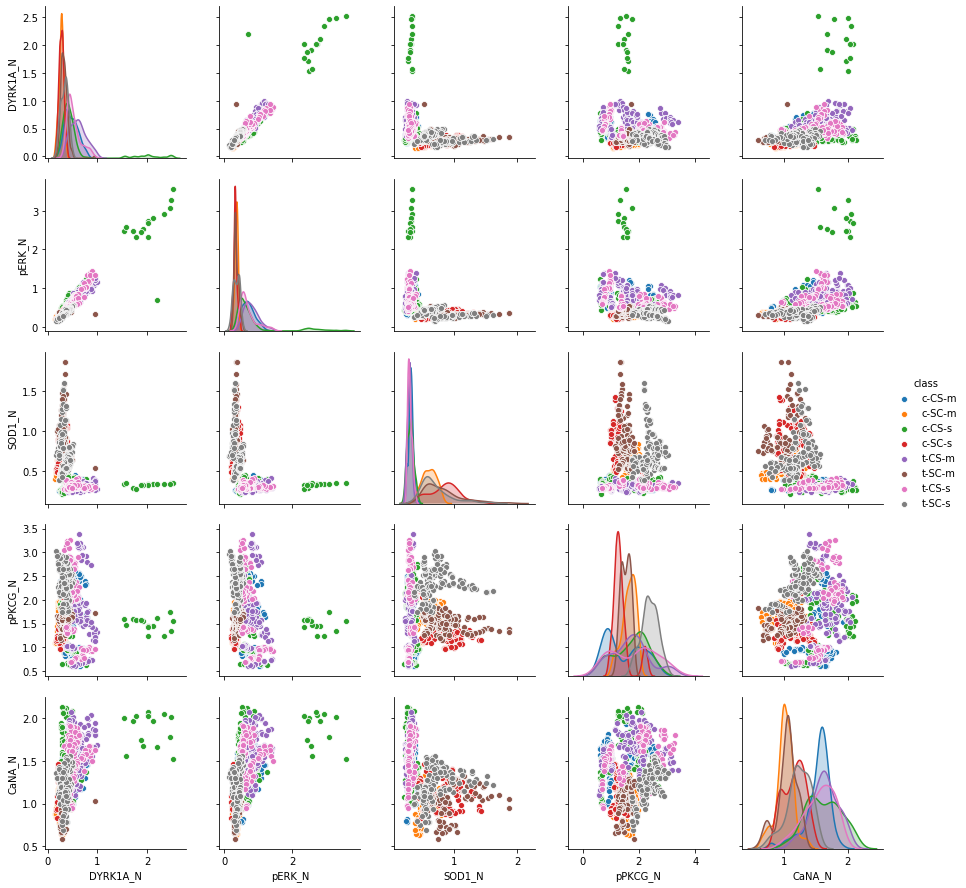

In [115]:
#sns.pairplot(pcaFeatures,hue="cancer_type",vars=pcaFeatures.columns[[0,3,10]])
sns.pairplot(data,hue="class",vars=data.columns[indici])

### 6. Perform PCA on all standarized numerical features

In [120]:
len(good_data.columns)

77

In [123]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#avem datele standardizate in : 'data_scaled'

numberOfFeatures = 77
pca = PCA(n_components = numberOfFeatures).fit(data_scaled)

pcaFeatures = pd.DataFrame(pca.transform(data_scaled))
pcaFeatures['class']=targetData

In [124]:
pcaFeatures

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,class
0,-4.150955,4.895384,-1.697352,-1.914854,-0.656775,-1.750995,0.096573,-1.640318,0.067286,0.671518,...,0.113528,-0.055379,0.160706,0.053950,-0.068621,-0.117392,0.187500,-0.021884,3.627146e-17,c-CS-m
1,-2.563560,4.804695,-0.827996,-1.477078,-0.322832,-1.350380,-0.065752,-1.560318,0.107475,0.649734,...,0.014818,-0.033348,-0.049730,-0.007376,-0.123392,0.055179,-0.087001,0.137060,-1.121164e-16,c-CS-m
2,-2.653338,5.035138,-0.532218,-1.225556,-0.049164,-1.335487,-0.062062,-1.690626,0.087880,0.822922,...,-0.118970,0.058276,-0.031373,0.029370,0.051139,-0.086109,0.220064,-0.055403,1.204307e-16,c-CS-m
3,-0.524966,3.552819,-2.643803,-0.672296,-0.034376,-1.771895,-0.598516,-1.591677,0.262160,0.980468,...,-0.020844,0.098999,0.134945,0.024719,0.089870,-0.019805,0.024042,0.037020,2.446190e-16,c-CS-m
4,0.554189,3.672825,-1.477558,-0.398741,0.204581,-1.538471,-1.018047,-1.396323,0.356367,0.880259,...,-0.137689,0.119132,0.018513,0.131129,0.175424,-0.034599,0.036278,-0.033045,2.791220e-16,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,4.419346,-0.784647,1.934460,5.268478,-1.015907,0.385498,2.477464,1.001990,1.122762,-0.138440,...,-0.177917,-0.147335,-0.045833,-0.016578,0.039833,-0.042503,-0.061041,0.040745,-4.034454e-16,t-SC-s
1076,3.672633,-1.268877,1.299798,5.324706,-0.471878,0.245091,2.391857,1.125779,0.758007,-1.176044,...,-0.028024,0.001036,0.146585,0.202811,0.225422,0.127860,-0.214258,-0.076348,-3.477446e-16,t-SC-s
1077,6.977456,-1.834747,2.857135,6.275555,-0.246875,1.763297,1.844691,1.137844,0.469656,-0.946063,...,-0.080719,-0.017563,-0.012175,-0.003585,-0.029266,0.033415,-0.030921,-0.027999,-4.397357e-16,t-SC-s
1078,5.880329,-2.021917,3.197363,6.521200,-0.626534,2.004914,1.689232,1.671440,0.403888,-0.637813,...,-0.195222,-0.035328,0.113503,-0.223447,0.013304,-0.115154,-0.119617,0.071513,-1.752033e-16,t-SC-s


### 7.Using a bar plot, show the variance explained by the first k principal components (with k = 1 to numberOfFeatures)

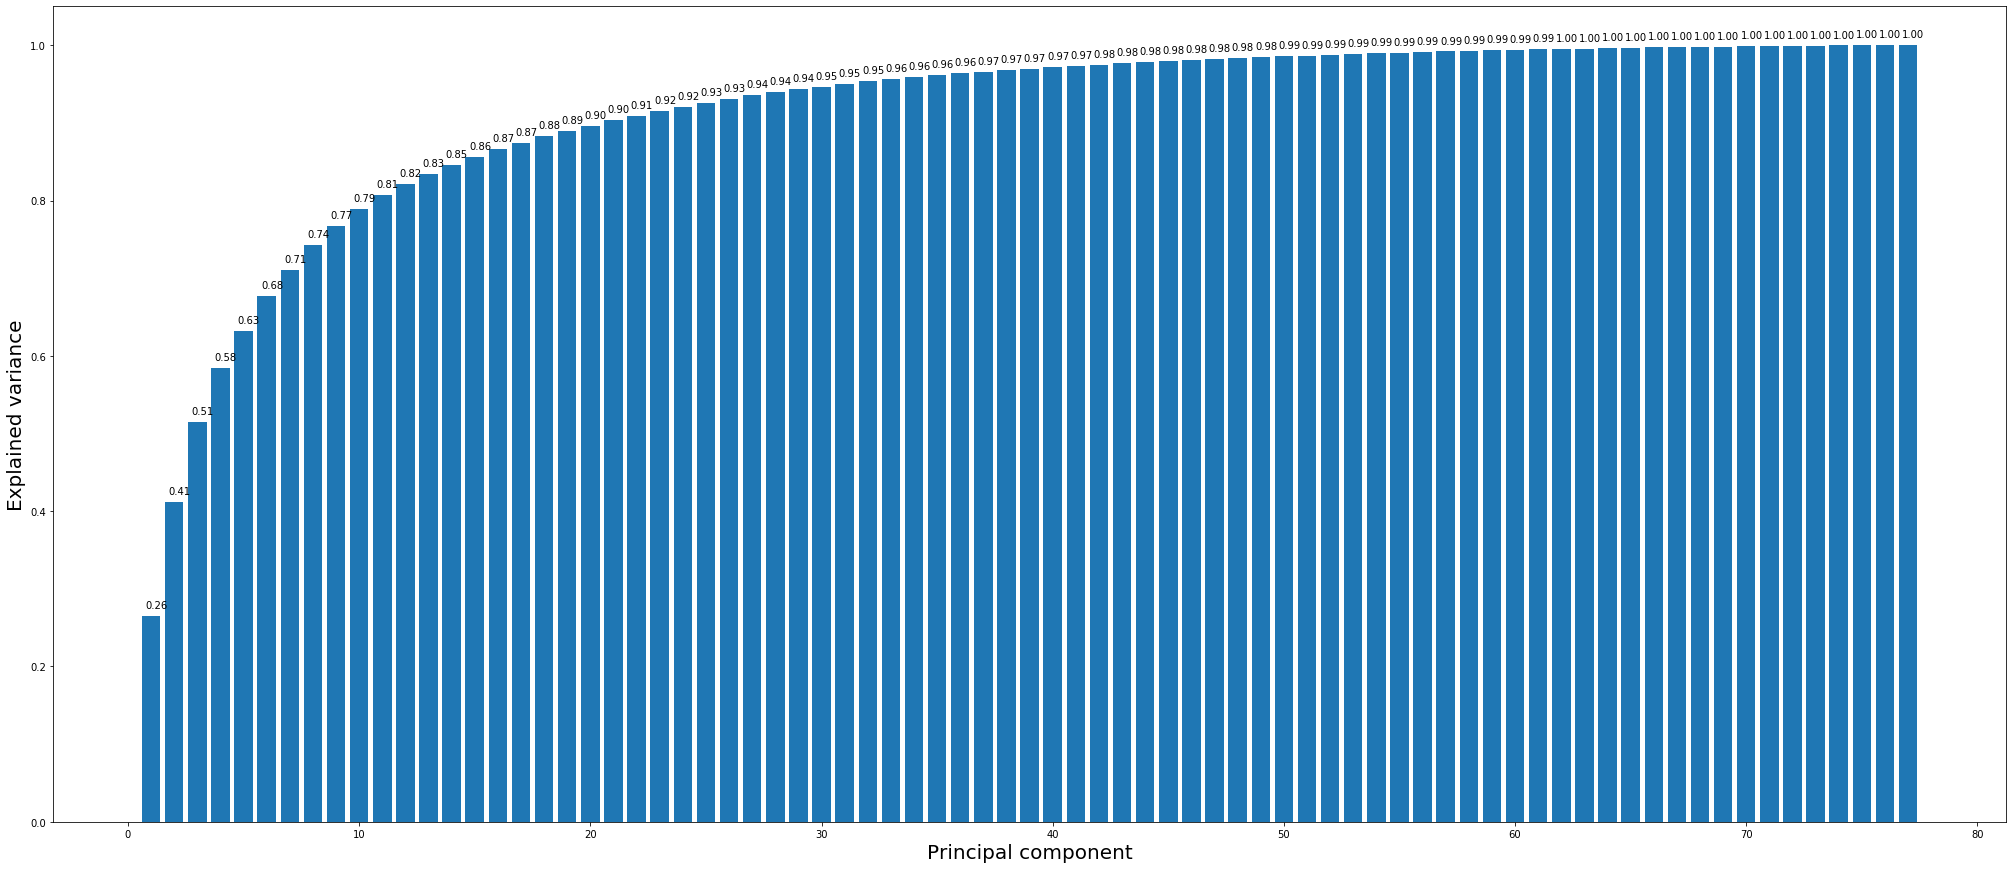

In [132]:
figure = plt.figure(figsize = (35,15))
x = np.arange(1,numberOfFeatures+1,1)
height = pca.explained_variance_ratio_.cumsum()
plt.xlabel('Principal component',fontdict = {'fontsize':20}) 
plt.ylabel('Explained variance',fontdict = {'fontsize':20})

plt.bar(x, height)
for i, v in enumerate(height):
    plt.text(x[i] - 0.25, v + 0.01, r'%.2f'%v)